# Введение в глубинное обучение, ФКН ВШЭ

## Домашнее задание 1. Полносвязные нейронные сети. 

### Общая информация

Оценка после штрафа после мягкого дедлайна вычисляется по формуле $M_{\text{penalty}} = M_{\text{full}} \cdot 0.85^{t/1440}$, где $M_{\text{full}}$ — полная оценка за работу без учета штрафа, а $t$ — время в минутах, прошедшее после мягкого дедлайна (округление до двух цифр после запятой). Таким образом, спустя первые сутки после мягкого дедлайна вы не можете получить оценку выше 8.5, а если сдать через четыре дня после мягкого дедлайна, то ваш максимум — 5.22 балла.

### Оценивание и штрафы

Максимально допустимая оценка за работу — 10 баллов. Сдавать задание после указанного срока сдачи нельзя.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке. Также оценка может быть снижена за плохо читаемый код и плохо оформленные графики. Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.

### О задании

В этом задании вам предстоит обучить полносвязную нейронную сеть для предсказания года выпуска песни по ее аудио-признакам. Для этого мы будем использовать [Million Songs Dataset](https://samyzaf.com/ML/song_year/song_year.html).

In [103]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from torch import nn
from torch.utils.data import TensorDataset, DataLoader
from tqdm.notebook import tqdm
from IPython.display import clear_output

plt.rcParams.update({'font.size': 16})
sns.set_style('whitegrid')
np.random.seed(0xFA1AFE1)

In [106]:
#link = 'https://drive.google.com/drive/folders/1vKNFsjHLi4zMsZFcDNtXjP408dkNTGEu?usp=share_link' # The shareable link

In [107]:
#https://drive.google.com/file/d/15OgTaGEAzK0b_6WeUExmM9siVl8tx8q0/view?usp=share_link

In [108]:
#fluff, id = link.split('=')
#print (id) # Verify that you have everything after '='

In [109]:
#downloaded = drive.CreateFile({'id':id}) 
#downloaded.GetContentFile('YearPredictionMSD.txt')  
#df3 = pd.read_csv('YearPredictionMSD.txt')
# Dataset is now stored in a Pandas Dataframe

In [110]:
#from google.colab import drive
#drive.mount('/content/drive')

Начнем с того, что скачаем и загрузим данные:

In [111]:
#kaggle competitions download -c msdchallenge

In [112]:
#https://www.kaggle.com/competitions/msdchallenge/overview

In [113]:
#!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

In [114]:
#! kaggle competitions download -c 'Million Song Dataset Challenge'

In [115]:
#from google.colab import files
#uploaded = files.upload()

In [116]:
#import io
#df = pd.read_csv(io.BytesIO(uploaded['data.txt.zip']), index_col=False, header=None, sep=',')
# Dataset is now stored in a Pandas Dataframe

In [117]:
#df

In [118]:
#df = pd.read_csv('C:/Users/Asus/Desktop/data.txt.zip', header=None)
#df
#df = pd.read_csv('C:/Users/Asus/Desktop/YearPredictionMSD.txt', header=None)
#df

#df2 = pd.read_csv('C:/Users/Asus/Documents/GitHub/ml-course-hse3/2022-fall/homeworks-practice/4/adult.data',
#                 header=None) # оригинальная функция у меня не работала

In [119]:
#!wget -O data.txt.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00203/YearPredictionMSD.txt.zip

In [120]:
#df = pd.read_csv('data.txt.zip', header=None)
#df

In [3]:
!wget -O data.txt https://www.dropbox.com/s/p0webq95u9956es/YearPredictionMSD.txt?dl=0

--2022-11-23 22:32:22--  https://www.dropbox.com/s/p0webq95u9956es/YearPredictionMSD.txt?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/p0webq95u9956es/YearPredictionMSD.txt [following]
--2022-11-23 22:32:22--  https://www.dropbox.com/s/raw/p0webq95u9956es/YearPredictionMSD.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd09e0137b56756373dca8c920a.dl.dropboxusercontent.com/cd/0/inline/BxV9rJdLanRPOSCF3HSrdS-Qea0CfclsoCU5avqI2Addrrn8Bi3PdV7iwCRegma-okFVBgqf5iSNm7h_9_-4nHqur04K5g6n1RqnIX5BgpOeBWhKSMrym2wTSl6z1dVvwGSvhbgcscfoKNjJKbazjNQD-wk06dvDUHVsoQWn51HI8w/file# [following]
--2022-11-23 22:32:23--  https://ucd09e0137b56756373dca8c920a.dl.dropboxusercontent.com/cd/0/inline/BxV9rJdLanRPOSCF3HSrdS-Qea0CfclsoCU5avqI2Addr

In [4]:
df = pd.read_csv('data.txt', header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515340,2006,51.28467,45.88068,22.19582,-5.53319,-3.61835,-16.36914,2.12652,5.18160,-8.66890,...,4.81440,-3.75991,-30.92584,26.33968,-5.03390,21.86037,-142.29410,3.42901,-41.14721,-15.46052
515341,2006,49.87870,37.93125,18.65987,-3.63581,-27.75665,-18.52988,7.76108,3.56109,-2.50351,...,32.38589,-32.75535,-61.05473,56.65182,15.29965,95.88193,-10.63242,12.96552,92.11633,10.88815
515342,2006,45.12852,12.65758,-38.72018,8.80882,-29.29985,-2.28706,-18.40424,-22.28726,-4.52429,...,-18.73598,-71.15954,-123.98443,121.26989,10.89629,34.62409,-248.61020,-6.07171,53.96319,-8.09364
515343,2006,44.16614,32.38368,-3.34971,-2.49165,-19.59278,-18.67098,8.78428,4.02039,-12.01230,...,67.16763,282.77624,-4.63677,144.00125,21.62652,-29.72432,71.47198,20.32240,14.83107,39.74909


Посмотрим на статистики по данным.

In [5]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


Целевая переменная, год выпуска песни, записана в первом столбце. Посмотрим на ее распределение.

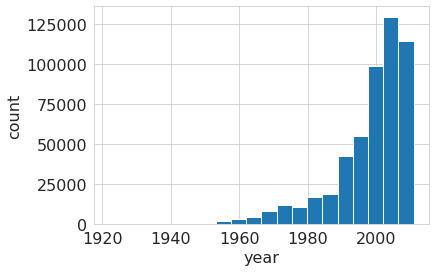

Range: 1922 - 2011
Unique values: 89


In [6]:
plt.hist(df.iloc[:, 0], bins=20)
plt.xlabel('year')
plt.ylabel('count')
plt.show()
print(f'Range: {df.iloc[:, 0].min()} - {df.iloc[:, 0].max()}')
print(f'Unique values: {np.unique(df.iloc[:, 0]).size}')

In [7]:
np.unique(df.iloc[:, 0])

array([1922, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011])

Разобьем данные на обучение и тест (не меняйте здесь ничего, чтобы сплит был одинаковым у всех).

In [8]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

train_size = int(0.75 * X.shape[0])
X_train = X[:train_size, :]
y_train = y[:train_size]
X_test = X[train_size:, :]
y_test = y[train_size:]
X_train.shape, X_test.shape

((386508, 90), (128837, 90))

**Задание 0 (0 баллов, но при невыполнении максимальная оценка за всю работу &mdash; 0 баллов).** Мы будем использовать MSE как метрику качества. Прежде чем обучать нейронные сети, нам нужно проверить несколько простых бейзлайнов, чтобы было с чем сравнить более сложные алгоритмы. Для этого бучите `Ridge` регрессию из `sklearn`. Кроме того, посчитайте качество при наилучшем константном прогнозе.

In [9]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)

print("Test MSE = %.4f" % mean_squared_error(y_test, y_pred, squared=True))
print("Train MSE = %.4f" % mean_squared_error(y_train, y_train_pred, squared=True))

Test MSE = 89.7497
Train MSE = 91.6651


In [10]:
ridge.intercept_

1951.268863180704

Понятно, что наилучший константный прогноз достигается, если взять за констану мат ожидание. Посчитаем мат ож


In [75]:
y_train.sum()/y_train.shape[0]

1998.3733187066416

In [76]:
y_const_pred_train = np.full_like(y_train, y_train.sum()/y_train.shape[0], dtype=np.double)
y_const_pred_test = np.full_like(y_test, y_train.sum()/y_train.shape[0], dtype=np.double)

In [77]:
print("Const Test MSE = %.4f" % mean_squared_error(y_test, y_const_pred_test, squared=True))
print("Const Train MSE = %.4f" % mean_squared_error(y_train, y_const_pred_train, squared=True))

Const Test MSE = 117.6262
Const Train MSE = 119.8659


На всякий случай перепроверим себя

In [79]:
i_min = 0
MSE_min = np.inf
for i in range(1922, 2012):
  Y_pred = np.full_like(y_test, i, dtype=np.double)
  i_MSE = mean_squared_error(y_test, Y_pred, squared=True)
  if i_MSE < MSE_min:
    i_min = i
    MSE_min = i_MSE
print("const=", i_min, "\nConst min MSE Test", MSE_min)

const= 1998 
Const min MSE Test 117.83191164028968


Итого:
* Ridge Test MSE = 89.7497
* Ridge Train MSE = 91.6651
* Const Test MSE = 117.6262
* Const Train MSE = 119.8659

Теперь приступим к экспериментам с нейросетями. Для начала отделим от данных валидацию:

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0xE2E4)
X_train.shape, X_val.shape

((289881, 90), (96627, 90))

## Глава I. Заводим нейронную сеть (5 баллов)

**Задание 1.1 (0.5 баллов).** Заполните пропуски в функции `train_and_validate`. Она поможет нам запускать эксперименты. Можете также реализовать поддержку обучения на GPU, чтобы эксперименты считались быстрее. Бесплатно воспользоваться GPU можно на сервисах **Google Colab** и **Kaggle**.

* за ответы на теор вопросы не ручаюсь, сильно хотелось спать, да и голова уже плохо соображает. За орфографию заранее сори

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


def plot_losses(train_losses, train_metrics, val_losses, val_metrics):
    '''
    Plot losses and metrics while training
      - train_losses: sequence of train losses
      - train_metrics: sequence of train MSE values
      - val_losses: sequence of validation losses
      - val_metrics: sequence of validation MSE values
    '''
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(val_losses) + 1), val_losses, label='val')
    axs[1].plot(range(1, len(train_metrics) + 1), train_metrics, label='train')
    axs[1].plot(range(1, len(val_metrics) + 1), val_metrics, label='val')

    if max(train_losses) / min(train_losses) > 10:
        axs[0].set_yscale('log')

    if max(train_metrics) / min(train_metrics) > 10:
        axs[0].set_yscale('log')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    axs[0].set_ylabel('loss')
    axs[1].set_ylabel('MSE')
    plt.show()


def train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader,
                       num_epochs, verbose=True):
    '''
    Train and validate neural network
      - model: neural network to train
      - optimizer: optimizer chained to a model
      - criterion: loss function class
      - metric: function to measure MSE taking neural networks predictions
                 and ground truth labels
      - train_loader: DataLoader with train set
      - val_loader: DataLoader with validation set
      - num_epochs: number of epochs to train
      - verbose: whether to plot metrics during training
    Returns:
      - train_mse: training MSE over the last epoch
      - val_mse: validation MSE after the last epoch
    '''
    train_losses, val_losses = [], []
    train_metrics, val_metrics = [], []

    for epoch in range(1, num_epochs + 1):
        model.train()
        running_loss, running_metric = 0, 0
        pbar = tqdm(train_loader, desc=f'Training {epoch}/{num_epochs}') \
            if verbose else train_loader

        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            '''
            YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
            Do forward and backward passes
            predictions = ...
            loss = ...
            '''

            X_batch = X_batch.to(device)  
            y_batch = y_batch.to(device)

            predictions = model(X_batch.float())  
            loss = criterion(predictions, y_batch) 
            loss.backward()  
            optimizer.step()  
            optimizer.zero_grad() 

            #print("X_batch", X_batch.float())
            #print("predict", predictions)
            #print("y_batch", y_batch)
            #print(predictions.shape, y_batch.shape)


            with torch.no_grad():
                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({'loss': loss.item(), 'MSE': metric_value})

        train_losses += [running_loss / len(train_loader.dataset)]
        train_metrics += [running_metric / len(train_loader.dataset)]

        model.eval()
        running_loss, running_metric = 0, 0
        pbar = tqdm(val_loader, desc=f'Validating {epoch}/{num_epochs}') \
            if verbose else val_loader

        for i, (X_batch, y_batch) in enumerate(pbar, 1):
            with torch.no_grad():
                '''
                YOUR CODE HERE (－.－)...zzzZZZzzzZZZ
                Do evaluation
                predictions = ...
                loss = ...
                '''

                X_batch = X_batch.to(device)
                y_batch = y_batch.to(device)

                predictions = model(X_batch.float())
                loss = criterion(predictions, y_batch)

                metric_value = metric(predictions, y_batch)
                if type(metric_value) == torch.Tensor:
                    metric_value = metric_value.item()
                running_loss += loss.item() * X_batch.shape[0]
                running_metric += metric_value * X_batch.shape[0]

            if verbose and i % 100 == 0:
                pbar.set_postfix({'loss': loss.item(), 'MSE': metric_value})

        val_losses += [running_loss / len(val_loader.dataset)]
        val_metrics += [running_metric / len(val_loader.dataset)]

        if verbose:
            plot_losses(train_losses, train_metrics, val_losses, val_metrics)
    
    if verbose:
        print(f'Validation MSE: {val_metrics[-1]:.3f}')

    return train_metrics[-1], val_metrics[-1]

**Задание 1.2 (0.75 балла).** Попробуем обучить нашу первую нейронную сеть. Здесь целевая переменная дискретная &mdash; это год выпуска песни. Поэтому будем учить сеть на классификацию c помощью [кросс-энтропийной функции потерь](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).

- В качестве архитектуры сети возьмите два линейных слоя с активацией ReLU между ними c числом скрытых нейронов, равным 128.
- Используйте SGD с `lr=1e-2`.
- Возьмите размер мини-батча около 32-64, примерно 3-4 эпох обучения должно быть достаточно.
- Скорее всего вам пригодится `torch.utils.data.TensorDataset`. Когда будете конвертировать numpy-массивы в torch-тензоры, используйте тип `torch.float32`.
- Также преобразуйте целевую переменную так, чтобы ее значения принимали значения от $0$ до $C-1$, где $C$ &mdash; число классов (лучше передайте преобразованное значение в TensorDataset, исходное нам еще пригодится)
- В качестве параметра `metric` в `train_and_validate` передайте lambda-выражение, которое считает MSE по выходу нейронной сети и целевой переменной. В случае классификации предсказывается класс с наибольшей вероятностью (или, что то же самое, с наибольшим значением **логита**$^1$).

$^1$ **Логит** &mdash; выход последнего линейного слоя, может принимать любые вещественные значения. Если применить Softmax к логитам, то получатся вероятности распределения классов.

In [13]:
#переобразовываем целевую переменную
from sklearn.preprocessing import OrdinalEncoder

y_train_OE = np.array(OrdinalEncoder().fit_transform(pd.DataFrame(data={'y': y_train})[["y"]]).reshape(1,-1)[0]).astype(int)
y_val_OE = np.array(OrdinalEncoder().fit_transform(pd.DataFrame(data={'y': y_val})[["y"]]).reshape(1,-1)[0]).astype(int)

In [14]:
xy_train = torch.utils.data.TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train_OE))
xy_val = torch.utils.data.TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val_OE))

In [15]:
train_loader = DataLoader(xy_train, batch_size=64, shuffle=True, num_workers=5)
val_loader = DataLoader(xy_val, batch_size=64, num_workers=5)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [16]:
for batch in train_loader:
    batch_x = batch[0]
    batch_y = batch[1]
    break
    
print(batch_x)
print(batch_y)

tensor([[ 38.5365, -61.3848, -41.7051,  ...,   4.9540, -15.4658,  -6.0881],
        [ 39.2754,  -2.8791, -46.4026,  ...,   8.2919, -42.0584,  -4.2819],
        [ 40.0145,  87.4433, -47.2506,  ...,   8.1761,  18.9397,  -0.7909],
        ...,
        [ 51.3252,  31.8610,  31.7186,  ...,  -4.5929,  39.9082,  13.4887],
        [ 45.9542,  12.0957,  35.3937,  ...,  -0.9589,  68.1353,  -1.4081],
        [ 45.0195,  -0.9213, -24.0402,  ...,   5.7710, 132.9797,  -6.9146]],
       dtype=torch.float64)
tensor([83, 78, 75, 84, 66, 85, 76, 78, 52, 79, 79, 81, 87, 61, 65, 83, 83, 84,
        81, 52, 45, 70, 71, 82, 86, 60, 73, 80, 33, 77, 82, 79, 67, 78, 83, 86,
        80, 86, 87, 47, 73, 80, 64, 84, 86, 72, 56, 70, 80, 84, 82, 76, 78, 68,
        76, 84, 77, 77, 78, 81, 83, 84, 85, 86])


In [17]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(
           nn.Linear(90, 128),
           nn.ReLU(),
           nn.Linear(128, 128),
           nn.ReLU(),
           nn.Linear(128, 89)
        )
        
    def forward(self, x):
        return self.linear(x)

In [18]:
def set_random_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

In [82]:
set_random_seed(101)
model = Net().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
criterion = nn.CrossEntropyLoss()
num_epochs = 4
metric = lambda a, b : ((a.argmax(dim=1) - b)**2).to(torch.float).mean()

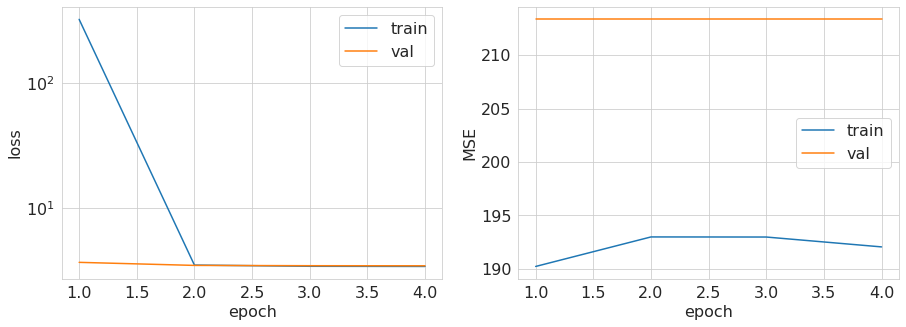

Validation MSE: 213.352


In [83]:
a, b = train_and_validate(model, optimizer, criterion, metric, train_loader, val_loader, num_epochs)

**Задание 1.3 (0.5 балла).** Прокомментируйте ваши наблюдения. Удалось ли побить бейзлайн? Как вы думаете, хорошая ли идея учить классификатор для этой задачи? Почему?

**Ответ:** Не удалось победить ни один из бейзлайнов. Графики нам говорят о том, что нейронка практически не обучается. 

Вообще, в этой задаче не так уж и много кластеров(так же предсказываемая величина является дискретной в некоторм диапозоне), так что обучение класификатора может оказать неплохой идеей. Но на сколько данное решение будет эффективнее или наоборот хуже по сравнению с обучением регресси утверждать сложно, так как для регрессии мы построили большое количество эксперементов, а для задачи классификации рассмотрели лишь одну конфигурацию. Так же стоит отметить, что данная модель ещё совсем сырая, так что никаких существенных выводов пока сделать нельзя.

**Задание 1.4 (0.75 балла).** Теперь попробуем решать задачу как регрессию. Обучите нейронную сеть на [MSE](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html).

- Используйте такие же гиперпараметры обучения.
- Когда передаете целевую переменную в TensorDataset, сделайте reshape в (-1, 1).
- Не забудьте изменить lambda-выражение, которые вы передаете в `train_and_validate`.
- Если что-то пойдет не так, можете попробовать меньшие значения `lr`.

In [20]:
xy_train2 = torch.utils.data.TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train.reshape(-1,1)).float())
xy_val2 = torch.utils.data.TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val.reshape(-1,1)).float())

In [21]:
train_loader2 = DataLoader(xy_train2, batch_size=64, shuffle=True, num_workers=5)
val_loader2 = DataLoader(xy_val2, batch_size=64, num_workers=5)

In [22]:
for batch in train_loader2:
    batch_x = batch[0]
    batch_y = batch[1]
    break
    
print(batch_x)
print(batch_y)

tensor([[ 44.7542,  33.1021,  40.1316,  ...,  -3.5600,   6.6653,  10.7907],
        [ 44.3082,  25.9134,   8.6478,  ...,  -6.0157, -40.4240, -15.7080],
        [ 40.7050,  20.3427,   9.5956,  ...,   7.6636, -80.9533, -18.2719],
        ...,
        [ 45.9493,  -0.2014,  11.1223,  ...,  -6.7550, -14.4636, -24.9949],
        [ 44.9629,  50.2834, -51.7560,  ...,   3.2128,  33.6045,  -5.8292],
        [ 41.2420, -32.1726,   7.0001,  ...,   3.0063, 187.0549,  29.9847]],
       dtype=torch.float64)
tensor([[1961.],
        [1988.],
        [1992.],
        [2001.],
        [2009.],
        [1999.],
        [2007.],
        [2005.],
        [1975.],
        [2010.],
        [2008.],
        [1990.],
        [1993.],
        [1997.],
        [1998.],
        [2000.],
        [1978.],
        [1988.],
        [2003.],
        [2008.],
        [1982.],
        [2000.],
        [2007.],
        [2007.],
        [1995.],
        [1958.],
        [1995.],
        [1983.],
        [2007.],
        [

In [23]:
class Net2(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(
           nn.Linear(90, 128),
           nn.ReLU(),
           nn.Linear(128, 128),
           nn.ReLU(),
           nn.Linear(128, 1)
        )
        
    def forward(self, x):
        return self.linear(x)

In [24]:
model2 = Net2().to(device)
optimizer2 = torch.optim.SGD(model2.parameters(), lr=1e-10)
criterion2 = nn.MSELoss()
num_epochs2 = 4
metric2 = lambda a, b : ((a - b)**2).to(torch.float).mean()

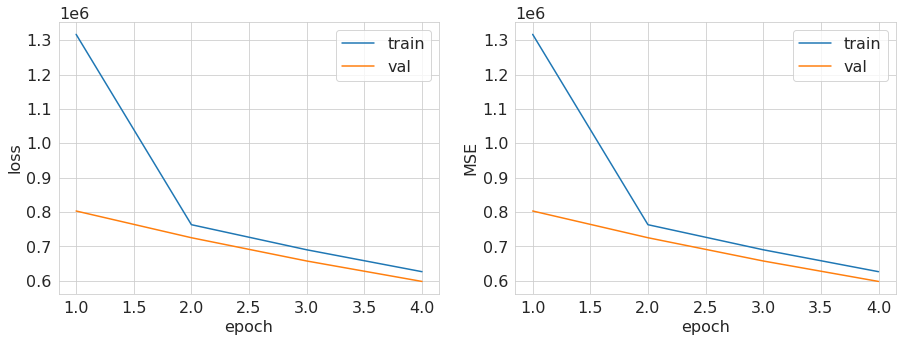

Validation MSE: 597784.977


In [274]:
a2, b2 = train_and_validate(model2, optimizer2, criterion2, metric2, train_loader2, val_loader2, num_epochs2)

**Задание 1.5 (0.5 балла).** Получилось ли у вас стабилизировать обучение? Помогли ли меньшие значения `lr`? Стало ли лучше от замены классификации на регрессию? Как вы думаете, почему так происходит? В качестве подсказки можете посмотреть на распределение целевой переменной и магнитуду значений признаков.

**Ответ:** Стабилизировать решение получилось лишь при уменьшении lr. Пока от замены классификации на регрессию стало только хуже. Такое существенное увеличение ошибки по всей видимости связано с большим средним значением и дисперсией признаков (что плохо сказывается на обучение регрессии).  

**Задание 1.6 (0.75 балла).** Начнем с того, что попробуем отнормировать целевую переменную. Для этого воспользуемся min-max нормализацией, чтобы целевая переменная принимала значения от 0 до 1. Реализуйте функции `normalize` и `denormalize`, которые, соответственно, нормируют целевую переменную и применяют обратное преобразование. Минимум и максимум оцените по обучающей выборке (то есть эти константы должны быть фиксированными и не зависеть от передаваемой выборки).

In [25]:
def normalize(sample):
    '''
    Min-max normalization to convert sample to [0, 1] range
    '''
    return (sample - y.min())/(y.max() - y.min())

def denormalize(sample):
    '''
    Denormalize sample from [0, 1] to initial range
    '''
    return (sample * (y.max() - y.min())) + y.min()

In [26]:
print(normalize(y_train))

[0.88764045 0.83146067 0.97752809 ... 0.91011236 0.61797753 0.86516854]


In [27]:
print(denormalize(normalize(y_train)))

[2001. 1996. 2009. ... 2003. 1977. 1999.]


In [28]:
y_train

array([2001, 1996, 2009, ..., 2003, 1977, 1999])

Теперь повторите эксперимент из **задания 1.4**, обучаясь на нормированной целевой переменной. Сделаем также еще одно изменение: добавим [сигмоидную активацию](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) после последнего линейного слоя сети. Таким образом мы гарантируем, что нейронная сеть предсказывает числа из промежутка $[0, 1]$. Использование активации - довольно распространенный прием, когда мы хотим получить числа из определенного диапазона значений. 

In [29]:
xy_train3 = torch.utils.data.TensorDataset(torch.from_numpy(X_train), torch.from_numpy(normalize(y_train).reshape(-1,1)).float())
xy_val3 = torch.utils.data.TensorDataset(torch.from_numpy(X_val), torch.from_numpy(normalize(y_val).reshape(-1,1)).float())

In [30]:
train_loader3 = DataLoader(xy_train3, batch_size=64, shuffle=True, num_workers=5)
val_loader3 = DataLoader(xy_val3, batch_size=64, num_workers=5)

In [31]:
for batch in train_loader3:
    batch_x = batch[0]
    batch_y = batch[1]
    break
    
print(batch_x)
print(batch_y)

tensor([[  46.4882,   37.9581,   10.1307,  ...,   86.5444,  -21.4854,
          -18.2050],
        [  48.7885,   39.4887,   28.2490,  ...,   -2.3296,   37.6567,
           -3.2970],
        [  41.8266,   39.4812,   27.7436,  ...,   18.1632,   26.0473,
            7.9190],
        ...,
        [  35.9104, -151.5876,   45.6196,  ...,   21.1277,   80.2598,
           39.4987],
        [  40.7977,   -6.3816,   60.1941,  ...,    9.7899,  -43.1033,
          -22.3002],
        [  48.8968,   38.2988,   30.5479,  ...,    0.7032,  125.6279,
           -3.8722]], dtype=torch.float64)
tensor([[0.6742],
        [0.8876],
        [0.7303],
        [0.6404],
        [0.9326],
        [0.7865],
        [0.9326],
        [0.9551],
        [0.8315],
        [0.9326],
        [0.9663],
        [0.9663],
        [0.9326],
        [0.8539],
        [0.7640],
        [0.5843],
        [0.7865],
        [0.8427],
        [0.8989],
        [0.9663],
        [0.9213],
        [0.6404],
        [0.9438],
     

In [32]:
class Net3(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(
           nn.Linear(90, 128),
           nn.ReLU(),
           nn.Linear(128, 128),
           nn.ReLU(),
           nn.Linear(128, 1),
           nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.linear(x)

In [33]:
model3 = Net3().to(device)
optimizer3 = torch.optim.SGD(model3.parameters(), lr=1e-6)
criterion3 = nn.MSELoss()
num_epochs3 = 4
metric3 = lambda a, b : ((denormalize(a) - denormalize(b))**2).to(torch.float).mean()

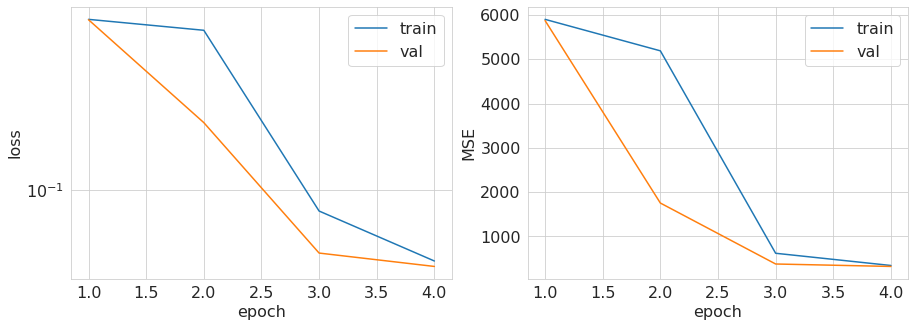

Validation MSE: 324.266


In [406]:
a3, b3 = train_and_validate(model3, optimizer3, criterion3, metric3, train_loader3, val_loader3, num_epochs3)

**Задание 1.7 (0.5 балла).** Сравните результаты этого эксперимента с предыдущим запуском. 

**Ответ:** Модель существенно улудчилась, посредством нормировки таргета и функции активации. Из-за нормировки таргета, веса параметров модели уменьшается, что положительно вливаят на качество регрессии.

**Задание 1.8 (0.75 балла).** На этот раз попробуем отнормировать не только целевую переменную, но и сами данные, которые подаются сети на вход. Для них будем использовать нормализацию через среднее и стандартное отклонение. Преобразуйте данные и повторите прошлый эксперимент. Скорее всего, имеет смысл увеличить число эпох обучения.

In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


x_train_SS = StandardScaler().fit_transform(X_train)
x_train_SS

array([[ 1.14129801,  0.79244189,  0.21308991, ..., -0.16441872,
         0.82288098, -0.52393738],
       [-0.44954269,  1.02313966, -1.31440453, ...,  1.4094297 ,
         0.34510876,  1.15123915],
       [ 0.79042495,  0.05926402, -0.49114576, ...,  0.82330536,
        -0.54782599, -0.34071896],
       ...,
       [-0.19865974, -2.19057981,  1.00476177, ...,  1.98911314,
         1.38298309, -1.74586885],
       [-0.59562419,  0.18416938, -0.23458092, ...,  0.36118063,
         0.19952542,  0.39224446],
       [ 0.49969026,  0.44936289,  0.92849866, ...,  0.91923044,
        -0.07125517,  0.29574997]])

In [35]:
x_train_ss = StandardScaler().fit_transform(X_train)
y_train_norm = normalize(y_train).reshape(-1,1)

x_val_ss = StandardScaler().fit_transform(X_val)
y_val_norm = normalize(y_val).reshape(-1,1)



xy_train4 = torch.utils.data.TensorDataset(torch.from_numpy(x_train_ss), torch.from_numpy(y_train_norm).float())
xy_val4 = torch.utils.data.TensorDataset(torch.from_numpy(x_val_ss), torch.from_numpy(y_val_norm).float())

In [36]:
train_loader4 = DataLoader(xy_train4, batch_size=64, shuffle=True, num_workers=5)
val_loader4 = DataLoader(xy_val4, batch_size=64, num_workers=5)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [37]:
for batch in train_loader4:
    batch_x = batch[0]
    batch_y = batch[1]
    break
    
print(batch_x)
print(batch_y)

tensor([[ 0.0560, -2.0276,  0.3822,  ..., -1.4798,  0.1293,  0.2013],
        [-1.4753, -0.4621,  1.9315,  ..., -0.0554,  0.4985, -0.5332],
        [-0.8125,  0.5252,  1.3442,  ..., -0.5008,  0.2257, -0.5779],
        ...,
        [ 0.2569, -0.5881,  0.4784,  ..., -1.4116,  1.5222,  1.6439],
        [ 1.1764,  0.5061,  1.3751,  ..., -0.3623, -0.1863, -0.0945],
        [-0.4174,  0.9796, -1.7630,  ...,  1.0730, -0.3825, -1.0719]],
       dtype=torch.float64)
tensor([[0.9213],
        [0.9551],
        [0.7753],
        [0.6404],
        [0.7416],
        [0.9438],
        [0.9326],
        [0.9213],
        [0.5843],
        [0.8652],
        [0.9326],
        [0.8539],
        [0.8315],
        [0.8539],
        [0.8427],
        [0.8202],
        [0.9551],
        [0.9438],
        [0.9663],
        [0.9551],
        [0.6742],
        [0.5618],
        [0.9101],
        [0.9663],
        [0.8764],
        [0.9551],
        [0.8539],
        [0.7978],
        [0.8764],
        [0.9551]

In [38]:
class Net4(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(
           nn.Linear(90, 128),
           nn.ReLU(),
           nn.Linear(128, 128),
           nn.ReLU(),
           nn.Linear(128, 1),
           nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.linear(x)

In [39]:
model4 = Net4().to(device)
optimizer4 = torch.optim.SGD(model4.parameters(), lr=1e-2)
criterion4 = nn.MSELoss()
num_epochs4 = 6
metric4 = lambda a, b : ((denormalize(a) - denormalize(b))**2).to(torch.float).mean()

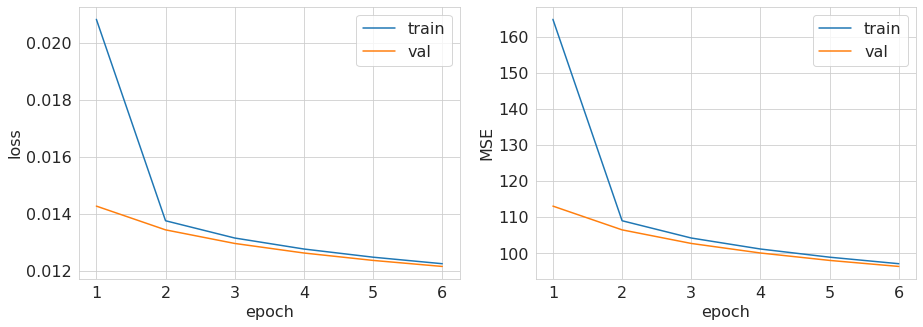

Validation MSE: 96.371


In [396]:
a4, b4 = train_and_validate(model4, optimizer4, criterion4, metric4, train_loader4, val_loader4, num_epochs4)

Если вы все сделали правильно, то у вас должно было получиться качество, сравнимое с `Ridge` регрессией.

**Мораль:** как видите, нам пришлось сделать очень много хитрых телодвижений, чтобы нейронная сеть работала хотя бы так же, как и простая линейная модель. Здесь, конечно, показан совсем экстремальный случай, когда без нормализации данных нейронная сеть просто не учится. Как правило, в реальности завести нейронную сеть из коробки не очень сложно, но вот заставить ее работать на полную &mdash; куда более трудоемкая задача. Написание пайплайнов обучения нейросетевых моделей требует большой аккуратности, а дебаг часто превращается в угадайку. К счастью, очень часто на помощь приходит интуиция, и мы надеемся, что вы сможете выработать ее в течение нашего курса. Начнем с двух советов, которые стоит принять на вооружение:

- Обязательно начинаем любые эксперименты с бейзлайнов: без них мы бы не поняли, что нейронная сеть не учится в принципе.
- При постановке эксперментов старайтесь делать минимальное количество изменений за раз (в идеале одно!): только так можно понять, какие конкретно изменения влияют на результат.

## Часть 2. Улучшаем нейронную сеть (5 баллов)

Продолжим экспериментировать с нейронной сетью, чтобы добиться еще лучшего качества.

**Задание 2.1 (1 балл).** Давайте попробуем другие оптимизаторы. Обучите нейросеть с помощью SGD+momentum и Adam. Опишите свои наблюдения и в дальнейших запусках используйте лучший оптимизатор. Для Adam обычно берут learning rate поменьше, в районе $10^{-3}$.

In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

In [40]:
x_train_ss = StandardScaler().fit_transform(X_train)
y_train_norm = normalize(y_train).reshape(-1,1)

x_val_ss = StandardScaler().fit_transform(X_val)
y_val_norm = normalize(y_val).reshape(-1,1)



xy_train5 = torch.utils.data.TensorDataset(torch.from_numpy(x_train_ss), torch.from_numpy(y_train_norm).float())
xy_val5 = torch.utils.data.TensorDataset(torch.from_numpy(x_val_ss), torch.from_numpy(y_val_norm).float())

In [41]:
train_loader5 = DataLoader(xy_train5, batch_size=64, shuffle=True, num_workers=5)
val_loader5 = DataLoader(xy_val5, batch_size=64, num_workers=5)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 5 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [47]:
class Net5(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(
           nn.Linear(90, 128),
           nn.ReLU(),
           nn.Linear(128, 128),
           nn.ReLU(),
           nn.Linear(128, 1),
           nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.linear(x)

Сперва подберём длину шага SGD

In [90]:
model5 = Net5().to(device)
optimizer5 = torch.optim.SGD(model5.parameters(), lr=1e-2)
criterion5 = nn.MSELoss()
num_epochs5 = 5
metric5 = lambda a, b : ((denormalize(a) - denormalize(b))**2).to(torch.float).mean()

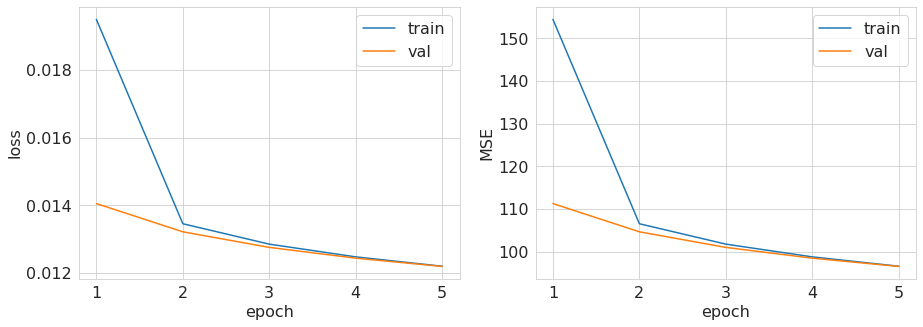

Validation MSE: 96.596


In [91]:
a5, b5 = train_and_validate(model5, optimizer5, criterion5, metric5, train_loader5, val_loader5, num_epochs5)

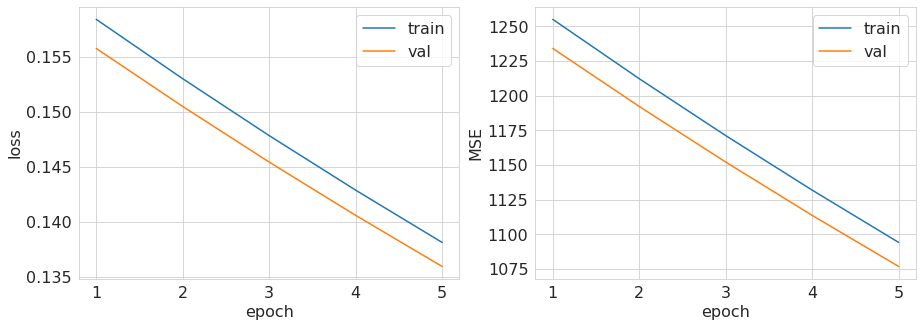

Validation MSE: 1076.863


In [92]:
model6 = Net5().to(device)
optimizer6 = torch.optim.SGD(model6.parameters(), lr=1e-5)

a6, b6 = train_and_validate(model6, optimizer6, criterion5, metric5, train_loader5, val_loader5, num_epochs5)

Теперь поиграемся с momentum

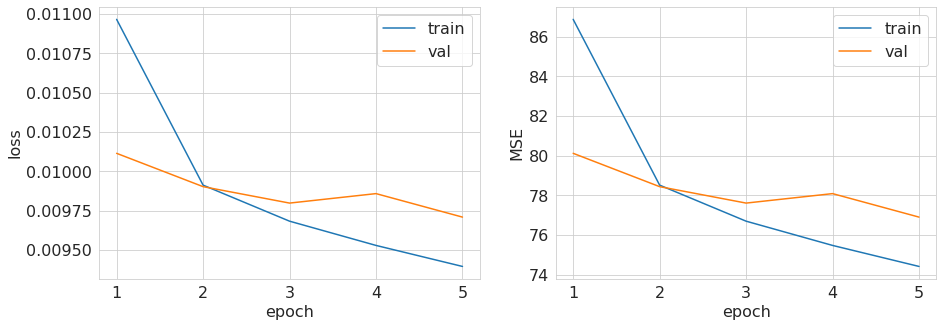

Validation MSE: 76.901


In [421]:
model7 = Net5().to(device)
optimizer7 = torch.optim.SGD(model7.parameters(), lr=1e-1, momentum=0.9)

a7, b7 = train_and_validate(model7, optimizer7, criterion5, metric5, train_loader5, val_loader5, num_epochs5)

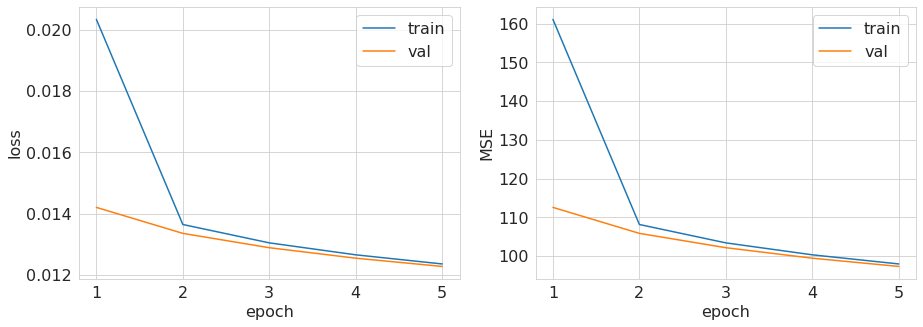

Validation MSE: 97.323


In [425]:
model8 = Net5().to(device)
optimizer8 = torch.optim.SGD(model8.parameters(), lr=1e-2, momentum=0.1)

a8, b8 = train_and_validate(model8, optimizer8, criterion5, metric5, train_loader5, val_loader5, num_epochs5)

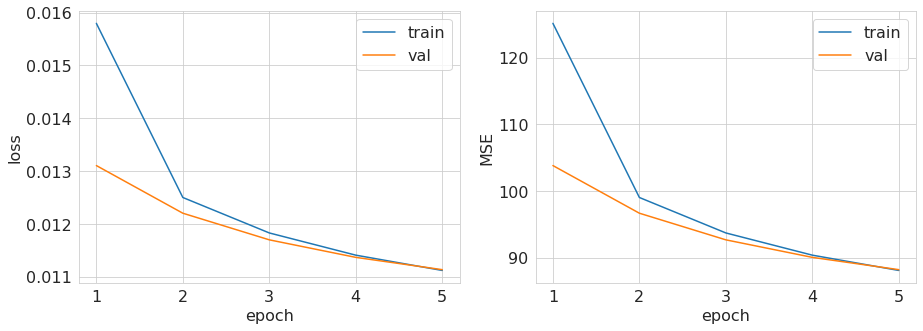

Validation MSE: 88.207


In [88]:
model8_ = Net5().to(device)
optimizer8_ = torch.optim.SGD(model8_.parameters(), lr=1e-2, momentum=0.6)

a8_, b8_ = train_and_validate(model8_, optimizer8_, criterion5, metric5, train_loader5, val_loader5, num_epochs5)

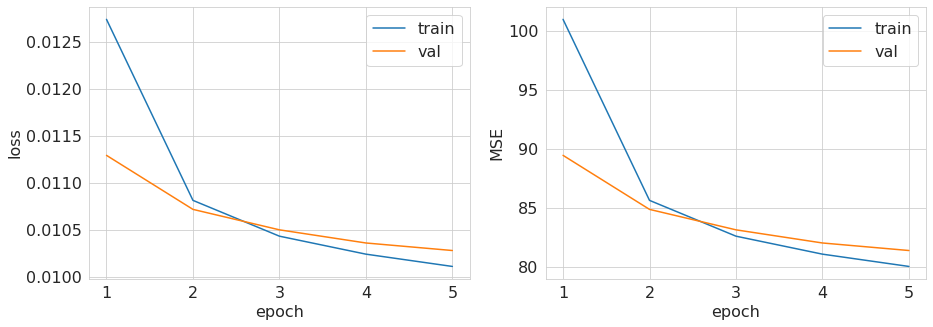

Validation MSE: 81.410


In [89]:
model_8 = Net5().to(device)
optimizer_8 = torch.optim.SGD(model_8.parameters(), lr=1e-2, momentum=0.9)

_a8, _b8 = train_and_validate(model_8, optimizer_8, criterion5, metric5, train_loader5, val_loader5, num_epochs5)

при momentum=0.9 модель начинает по немногу переобучаться, но пока не критично (но, тем не менее, предсказание таргкта всё ещё улудчается, тк MSE уменьшается)

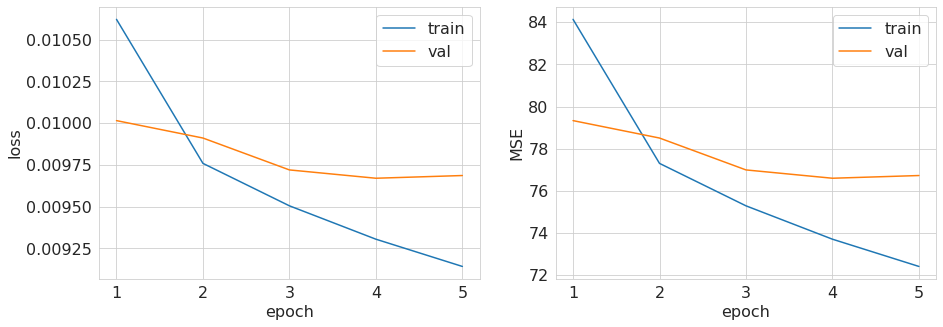

Validation MSE: 76.729


In [44]:
model9 = Net5().to(device)
optimizer9 =  torch.optim.Adam(model9.parameters(), lr=1e-3)

a9, b9 = train_and_validate(model9, optimizer9, criterion5, metric5, train_loader5, val_loader5, num_epochs5)

Adam при lr=1e-3 очень похож на SGD+momentum при lr=1e-2 momentum=0.9, но можно заметить, что тенденция переобучения у Adam выше в нашем случае, так что я предпочту далее использовать при обучении моделий SGD(lr=1e-2)+momentum (momentum=0.9)

**Задание 2.2 (1 балл).** Теперь сделаем нашу нейронную сеть более сложной. Попробуйте сделать сеть:

- более широкой (то есть увеличить размерность скрытого слоя, например, вдвое)
- более глубокой (то есть добавить еще один скрытый слой)

Опишите, как увеличение числа параметров модели влияет на качество на обучающей и валидационной выборках.

In [48]:
class Net6(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(
           nn.Linear(90, 256),
           nn.ReLU(),
           nn.Linear(256, 256),
           nn.ReLU(),
           nn.Linear(256, 1),
           nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.linear(x)

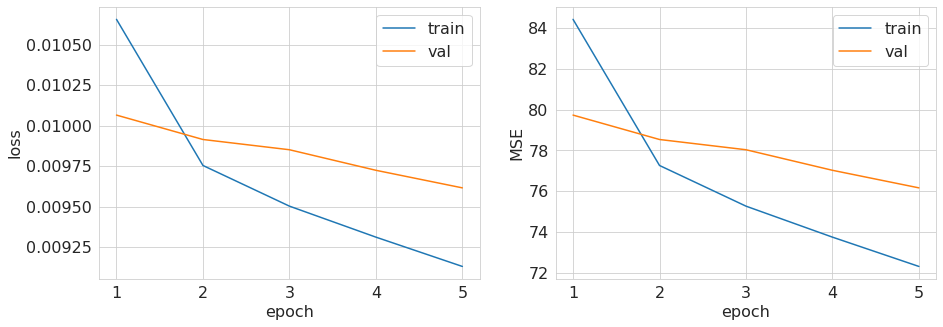

Validation MSE: 76.165


In [56]:
model10 = Net6().to(device)
optimizer10 = torch.optim.SGD(model10.parameters(), lr=1e-1, momentum=0.9)

a10, b10 = train_and_validate(model10, optimizer10, criterion5, metric5, train_loader5, val_loader5, num_epochs5)

При увеличении ширимы модели, ошибка MSE уменьшается, но так же модель начинает сильнее переобучаться.

In [50]:
class Net7(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(
           nn.Linear(90, 128),
           nn.ReLU(),
           nn.Linear(128, 128),
           nn.ReLU(),
           nn.Linear(128, 128),
           nn.ReLU(),
           nn.Linear(128, 1),
           nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.linear(x)

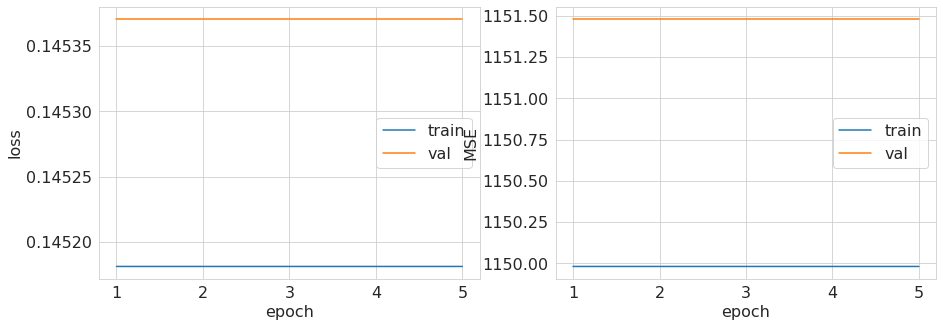

Validation MSE: 1151.479


In [51]:
model11 = Net7().to(device)

a11, b11 = train_and_validate(model11, optimizer10, criterion5, metric5, train_loader5, val_loader5, num_epochs5)

При увеличении глубины нейронки, качество модели существенно падает

In [52]:
class Net8(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(
           nn.Linear(90, 256),
           nn.ReLU(),
           nn.Linear(256, 256),
           nn.ReLU(),
           nn.Linear(256, 256),
           nn.ReLU(),
           nn.Linear(256, 1),
           nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.linear(x)

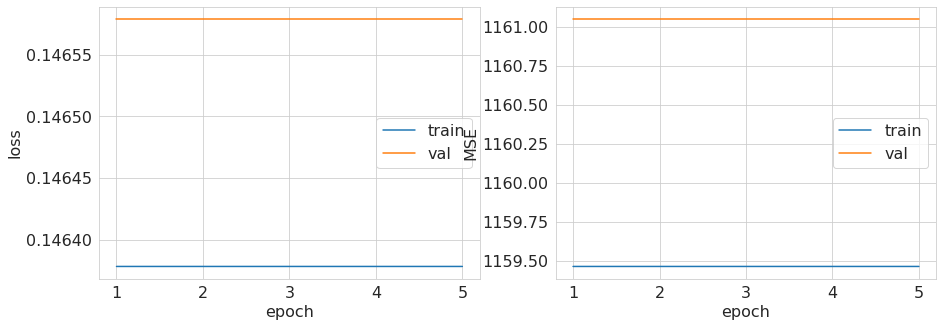

Validation MSE: 1161.050


In [53]:
model12 = Net8().to(device)

a12, b12 = train_and_validate(model12, optimizer10, criterion5, metric5, train_loader5, val_loader5, num_epochs5)

при увеличении и ширины, и глубины модели, можно заметить, что ухудшение модели при увеличении длины нейронки превалирует над улудшением модели при увеличении ширины модели. Далее будем увеличивать льши ширину модели.

**Задание 2.3 (1 балл).** Как вы должны были заметить, более сложная модель стала сильнее переобучаться. Попробуем добавить в обучение регуляризацию, чтобы бороться с переобучением. Добавьте слой дропаута ([`nn.Dropout`](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html#torch.nn.Dropout)) с параметром $p=0.2$ после каждого линейного слоя, кроме последнего. Почитать про дропаут можете в следующем [блогпосте](https://medium.com/@amarbudhiraja/https-medium-com-amarbudhiraja-learning-less-to-learn-better-dropout-in-deep-machine-learning-74334da4bfc5) или в оригинальной [статье](https://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf)

Опишите результаты. 

In [54]:
class Net9(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Sequential(
           nn.Linear(90, 256),
           nn.Dropout(p=0.2),
           nn.ReLU(),
           nn.Linear(256, 256),
           nn.Dropout(p=0.2),
           nn.ReLU(),
           nn.Linear(256, 1),
           nn.Sigmoid()
        )
        
    def forward(self, x):
        return self.linear(x)

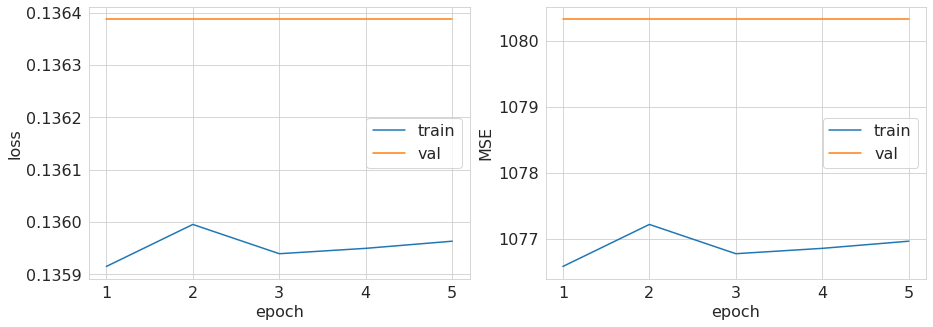

Validation MSE: 1080.324


In [55]:
model13 = Net9().to(device)

a13, b13 = train_and_validate(model13, optimizer10, criterion5, metric5, train_loader5, val_loader5, num_epochs5)

Качество модели существенно ухудшилось. Видимо модель переобучалась не критически, так что столь частое выбрасывание весов не требовалось в данном случае, стоило принять более щадящие меры 

**Задание 2.4 (1.5 балла).** Теперь, когда мы определились с выбором архитектуры нейронной сети, пора заняться рутиной DL-инженера &mdash; перебором гиперпараметров. Подберите оптимальное значение lr по значению MSE на валидации (по логарифмической сетке, достаточно посмотреть 3-4 значения), можете воспользоваться `verbose=False` в функции `train_and_validate`.

Также подберем оптимальное значение параметра weight decay для данного lr. Weight decay &mdash; это аналог L2-регуляризации для нейронных сетей. Почитать о нем можно, например, [здесь](https://paperswithcode.com/method/weight-decay). В PyTorch он задается как параметр оптимизатора `weight_decay`. Подберите оптимальное значение weight decay по логарифимической сетке (его типичные значения лежат в диапазоне $[10^{-6}, 10^{-3}]$, но не забудьте включить нулевое значение в сетку).

Постройте графики зависимости MSE на трейне и на валидации от значений параметров. Прокомментируйте получившиеся зависимости.

In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ

Как вы могли заметить, еще одна рутина DL-инженера &mdash; утомительное ожидание обучения моделей.

**Задание 2.5 (0.5 балла).** Мы провели большое число экспериментов и подобрали оптимальную архитектуру и гиперпараметры. Пришло время обучить модель на полной обучающей выборке, померять качество на тестовой выборке и сравнить с бейзлайнами. Проделайте это. 

In [ ]:
# YOUR CODE HERE (－.－)...zzzZZZzzzZZZ